In [1]:
name = "Payam Taebi"
stid = 400104867

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson

In [3]:
def poisSampleSmallAlpha(alpha):
    n = -1
    p = 1
    while( p >=  math.exp(-alpha) ):
        R = np.random.uniform(0,1,1)
        p *= R
        n+=1
    return n

In [4]:
def poisSampleBigAlpha(alpha):
    R1 = np.random.uniform(0,1,1)
    R2 = np.random.uniform(0,1,1)
    Z1 = math.pow((-2 * math.log(R1)),0.5) * math.cos(2*math.pi*R2)
    Z2 = math.pow((-2 * math.log(R1)),0.5) * math.sin(2*math.pi*R2)
    N1 = max(math.ceil(alpha + math.pow(alpha,0.5) * Z1 - 0.5) , 0)
    N2 = max(math.ceil(alpha + math.pow(alpha,0.5) * Z2 - 0.5) , 0)
    return N1,N2

In [5]:
def poisGenerator(alpha,n):
    res = []
    if alpha < 15:
        for i in range(n):
            res.append(poisSampleSmallAlpha(alpha))
    else:
        for i in range(n//2):
            p1,p2=poisSampleBigAlpha(alpha)
            res.append(p1)
            res.append(p2)
    return res

In [6]:
def ShowDetails(mySamples,numpySamples,mu,N,bins):
    print("N is ",N,"alpha is ",mu)
    print("in all plots black density show PMF of Poisson ")
    plt.figure(figsize=(25, 5))

    plt.subplot(141)
    plt.hist(mySamples, alpha=1,color='blue', edgecolor='black',bins=bins)
    plt.title("MySamples Histogram")
    
    tmp = plt.xlim()
    l = tmp[0]
    h = tmp[-1]
    x = np.arange(l,h,0.5)
    pmf = poisson.pmf(x, mu)
    plt.plot(x, pmf * N,alpha=0.5 , color="black" , lw=2)


    plt.subplot(142)
    plt.hist(numpySamples, alpha=1, color='blue', edgecolor='black',bins=bins)
    plt.title("NumpySamples Histogram")
    
    tmp = plt.xlim()
    l = tmp[0]
    h = tmp[-1]
    x = np.arange(l,h,0.5)
    pmf = poisson.pmf(x, mu)
    plt.plot(x, pmf * N,alpha=0.5, color="black", lw=2)


    plt.show()
    ##
    plt.hist(mySamples, alpha=0.5, color='red', edgecolor='black',bins=bins)

    plt.hist(numpySamples, alpha=0.5, color='green', edgecolor='black',bins=bins)
    plt.title("red:me || green:numpy")
    
    tmp = plt.xlim()
    l = tmp[0]
    h = tmp[-1]
    x = np.arange(l,h,0.5)
    pmf = poisson.pmf(x, mu)
    plt.plot(x, pmf * N, alpha =0.5, color="black", lw=2)

    plt.show()
    
    #
    plt.figure(figsize=(25, 5))

    plt.subplot(141)
    pd.Series(mySamples).plot(kind='density',bw_method=0.3) 
    plt.title("MySamples density")
    
    tmp = plt.xlim()
    l = tmp[0]
    h = tmp[-1]
    x = np.arange(l,h,0.5)
    pmf = poisson.pmf(x, mu)
    plt.plot(x, pmf , alpha =0.5, color="black", lw=2)

    plt.subplot(142)
    pd.Series(numpySamples).plot(kind='density',bw_method=0.3)
    plt.title("NumpySamples density")
    
    tmp = plt.xlim()
    l = tmp[0]
    h = tmp[-1]
    x = np.arange(l,h,0.5)
    pmf = poisson.pmf(x, mu)
    plt.plot(x, pmf ,alpha =0.5, color="black", lw=2)

    plt.show()
    
    ##
    
    pd.Series(mySamples).plot(kind='density',color="red",bw_method=0.3) 
    pd.Series(numpySamples).plot(kind='density',color = "green",bw_method=0.3) 
    plt.title("red:me || green:numpy")
    
    tmp = plt.xlim()
    l = tmp[0]
    h = tmp[-1]
    x = np.arange(l,h,0.5)
    pmf = poisson.pmf(x, mu)
    plt.plot(x, pmf ,alpha =0.5,color="black", lw=2)
    
    plt.show()


N is  100000 alpha is  6
in all plots black density show PMF of Poisson 


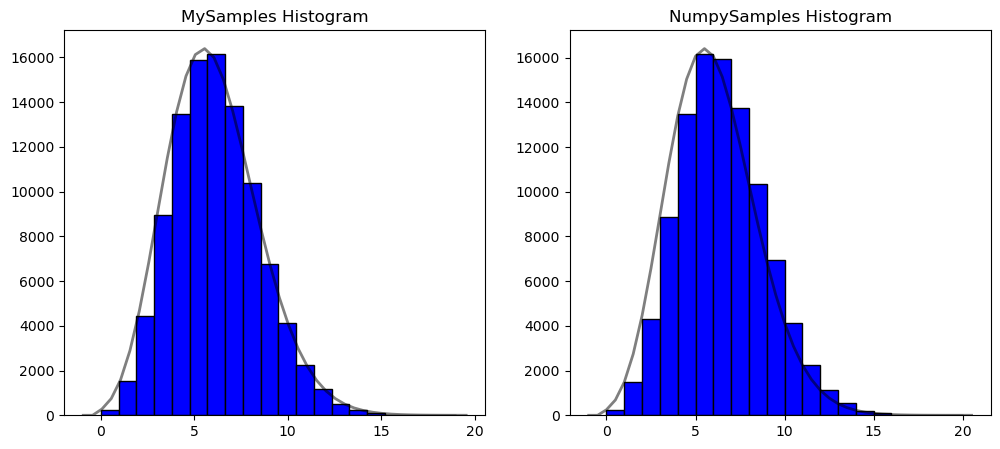

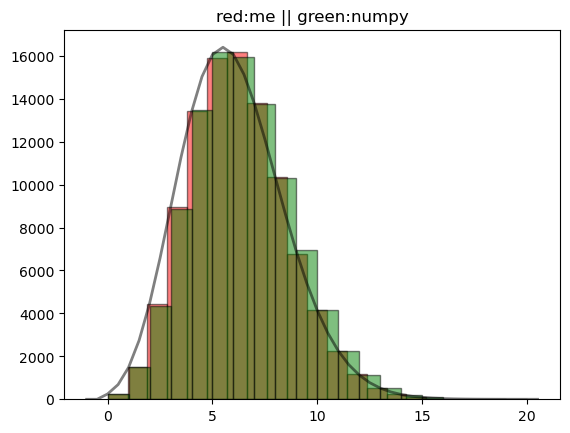

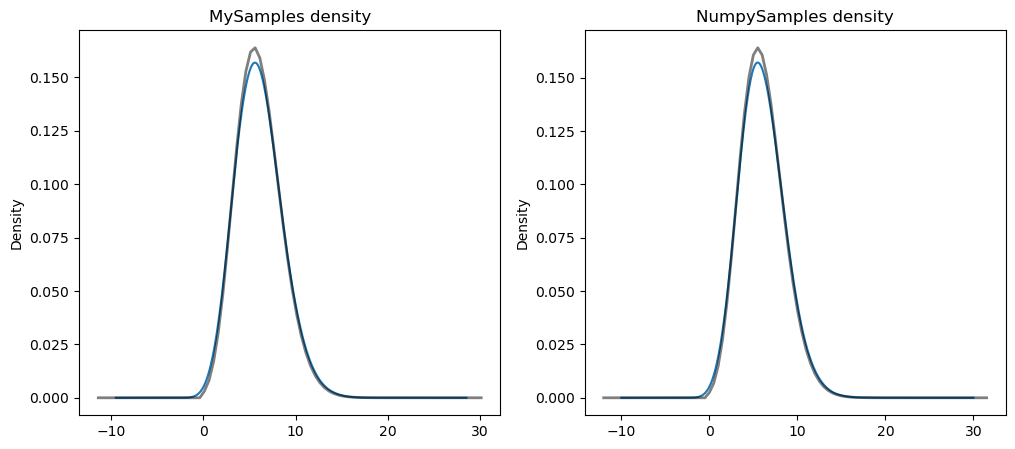

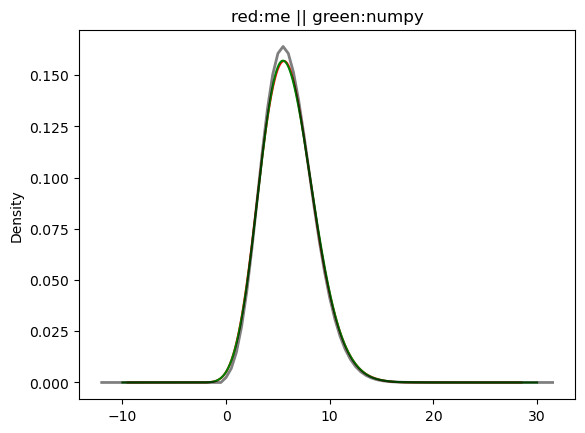

In [7]:
N = 100000
alpha = 6
mySamples = poisGenerator(alpha,N)
numpySamples = np.random.poisson(alpha,N)

ShowDetails(mySamples,numpySamples,alpha,N,20)

N is  100000 alpha is  18
in all plots black density show PMF of Poisson 


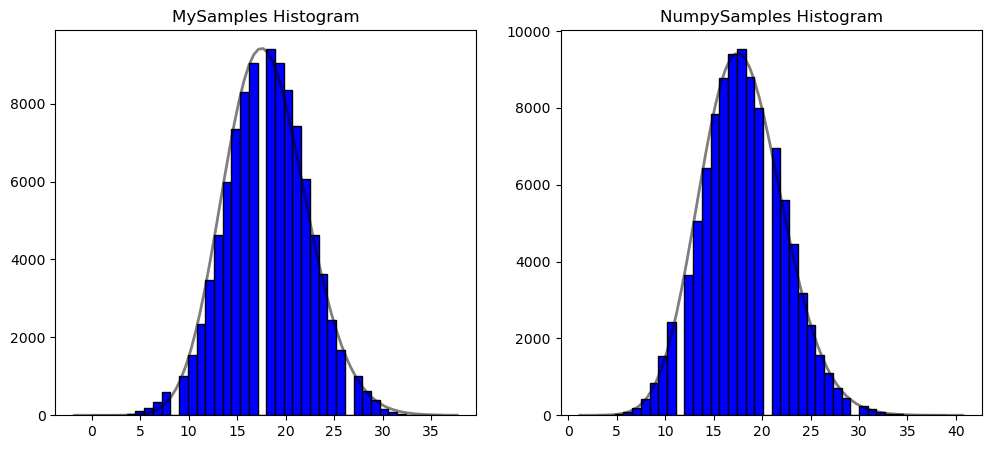

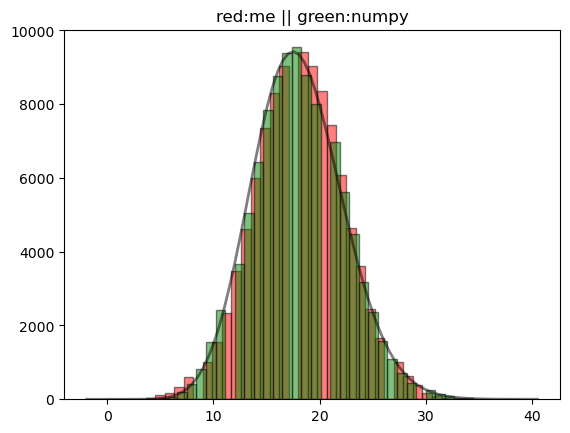

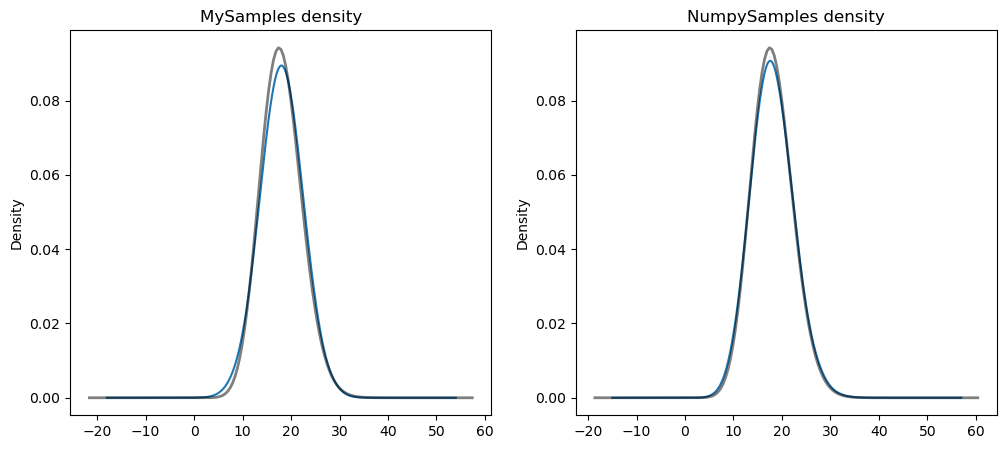

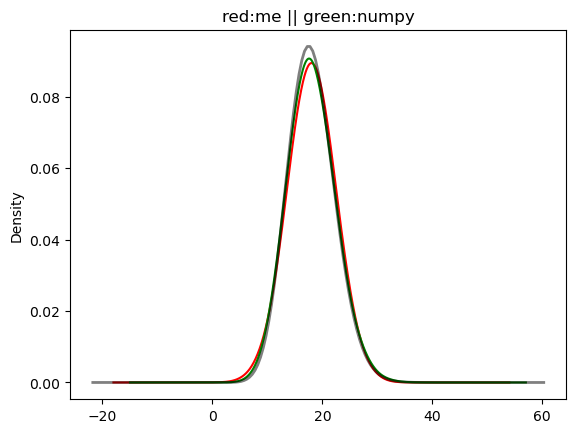

In [14]:
N = 100000
alpha = 18
mySamples = poisGenerator(alpha,N)
numpySamples = np.random.poisson(alpha,N)

ShowDetails(mySamples,numpySamples,alpha,N,40)